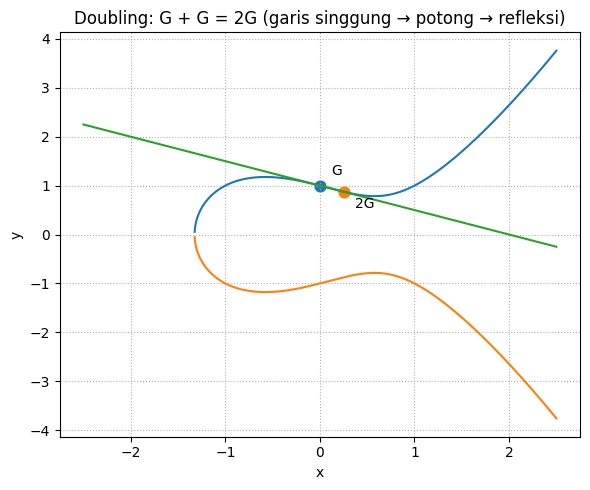

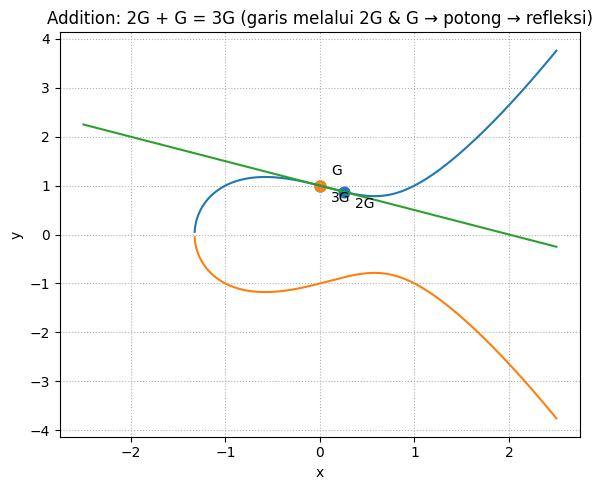

In [1]:
# Visualisasi konseptual penjumlahan titik di kurva eliptik (REAL numbers)
# Kurva contoh: y^2 = x^3 - x + 1  (bukan bidang hingga), agar mudah digambar.
# Tampilkan: G, 2G (doubling), dan 3G = 2G + G (addition)
#
# Catatan:
# - Ini untuk intuitif/visual. Di Bitcoin, perhitungan terjadi pada bidang hingga (mod p),
#   jadi tidak bisa divisualkan sebagai kurva mulus seperti ini.
# - Satu gambar untuk 2G, lalu satu gambar untuk 3G, sesuai aturan tool (satu plot per chart).

import numpy as np
import matplotlib.pyplot as plt

# Kurva: y^2 = x^3 + a x + b
a, b = -1.0, 1.0

def f(x):
    return x**3 + a*x + b

def on_curve(x, y, tol=1e-9):
    return abs(y**2 - f(x)) < tol

# Operasi titik (di R, bukan mod p)
def slope(P, Q):
    (x1, y1), (x2, y2) = P, Q
    if x1 == x2 and y1 == -y2:
        return None  # garis vertikal → hasil ke "infinity" (tak ditampilkan)
    if P != Q:
        return (y2 - y1) / (x2 - x1)
    # doubling
    return (3*x1*x1 + a) / (2*y1)

def add_points(P, Q):
    m = slope(P, Q)
    if m is None:
        return None  # titik di tak-hingga, tidak divisualkan di diagram ini
    x1, y1 = P
    x2, y2 = Q
    # Rumus koordinat hasil (di R)
    xr = m*m - x1 - x2
    yr = m*(x1 - xr) - y1
    # Refleksi terhadap sumbu-x
    return (xr, -yr)

# Pilih titik generator sederhana yang ada di kurva
G = (0.0, 1.0)  # karena 1^2 = 0^3 - 0 + 1 → 1 = 1

# Hitung 2G dan 3G
twoG = add_points(G, G)
threeG = add_points(twoG, G) if twoG is not None else None

# ---- Plot 1: Doubling (G + G = 2G) ----
xs = np.linspace(-2.5, 2.5, 1200)
ysq = f(xs)
mask = ysq >= 0
x_plot = xs[mask]
y_plot = np.sqrt(ysq[mask])

plt.figure(figsize=(6, 5))
plt.plot(x_plot, y_plot)
plt.plot(x_plot, -y_plot)

# Garis singgung di G
mG = slope(G, G)
# Untuk G=(0,1), mG = (3*0^2 + a)/(2*1) = a/2 = -0.5
x_line = np.linspace(-2.5, 2.5, 2)
y_line = mG*(x_line - G[0]) + G[1]
plt.plot(x_line, y_line)

# Titik G dan 2G
plt.scatter([G[0]], [G[1]], s=60)
if twoG is not None:
    plt.scatter([twoG[0]], [twoG[1]], s=60)
    plt.annotate("G", G, xytext=(8, 8), textcoords="offset points")
    plt.annotate("2G", twoG, xytext=(8, -12), textcoords="offset points")

plt.title("Doubling: G + G = 2G (garis singgung → potong → refleksi)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True, linestyle=":")
plt.tight_layout()
plt.show()

# ---- Plot 2: Addition (2G + G = 3G) ----
plt.figure(figsize=(6, 5))
plt.plot(x_plot, y_plot)
plt.plot(x_plot, -y_plot)

# Garis melalui 2G dan G
m_add = slope(twoG, G)
x_line2 = np.linspace(-2.5, 2.5, 2)
y_line2 = m_add*(x_line2 - twoG[0]) + twoG[1]
plt.plot(x_line2, y_line2)

# Titik G, 2G, 3G
plt.scatter([G[0], twoG[0]], [G[1], twoG[1]], s=60)
if threeG is not None:
    plt.scatter([threeG[0]], [threeG[1]], s=60)
    plt.annotate("G", G, xytext=(8, 8), textcoords="offset points")
    plt.annotate("2G", twoG, xytext=(8, -12), textcoords="offset points")
    plt.annotate("3G", threeG, xytext=(8, -12), textcoords="offset points")

plt.title("Addition: 2G + G = 3G (garis melalui 2G & G → potong → refleksi)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True, linestyle=":")
plt.tight_layout()
plt.show()


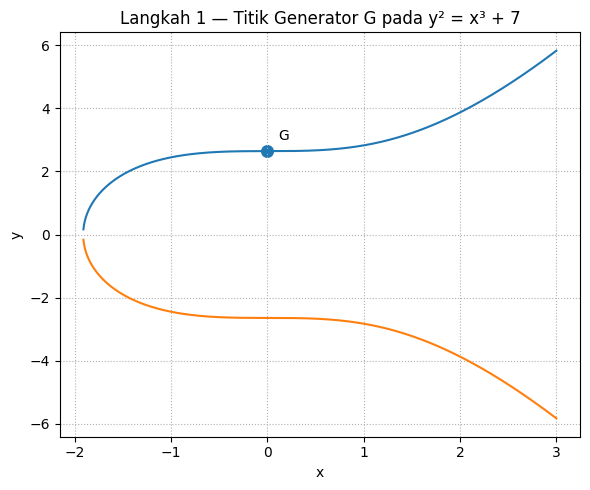

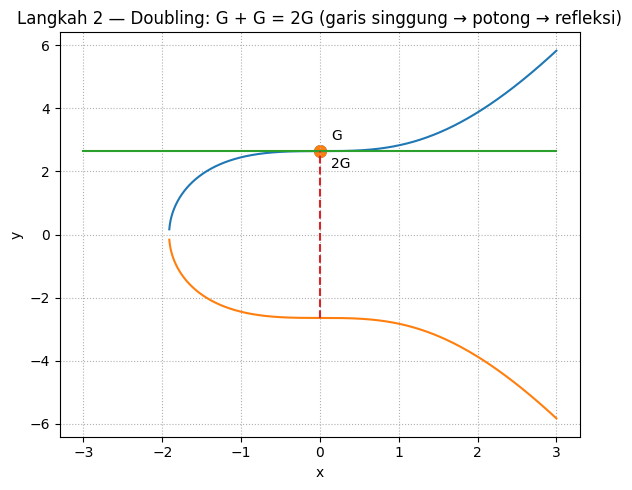

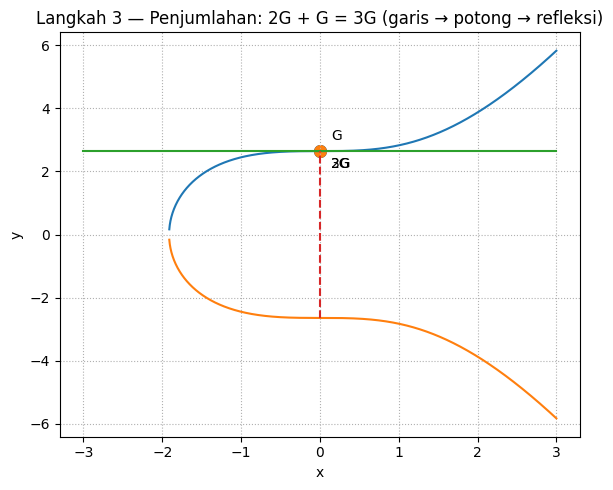

In [2]:
# Visualisasi mekanisme penjumlahan titik di kurva *Bitcoin-style* (y^2 = x^3 + 7) di bilangan real.
# Kita plot 3 langkah terpisah: (1) G, (2) 2G = G+G (garis singgung), (3) 3G = 2G+G (garis melalui dua titik).
# Catatan penting: Ini visualisasi intuitif di R (bilangan real). Di Bitcoin aslinya semuanya modulo p sehingga tak bisa digambar mulus.

import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

# Kurva "Bitcoin-style": y^2 = x^3 + 7  (a=0, b=7)
a, b = 0.0, 7.0

def f(x):
    return x**3 + a*x + b

def slope(P, Q):
    x1, y1 = P
    x2, y2 = Q
    if x1 == x2 and y1 == -y2:
        return None  # garis vertikal: hasil ke "infinity" (tak diplot di R)
    if P != Q:
        return (y2 - y1) / (x2 - x1)
    # doubling
    return (3*x1*x1 + a) / (2*y1)

def add_points(P, Q):
    m = slope(P, Q)
    if m is None:
        return None
    x1, y1 = P
    x2, y2 = Q
    xr = m*m - x1 - x2
    yr = m*(x1 - xr) - y1
    # refleksi sumbu-x
    return (xr, -yr), m

# Pilih titik G pada kurva y^2=x^3+7: ambil x=0 ⇒ y^2=7 ⇒ y=√7
G = (0.0, sqrt(7.0))

# Hitung 2G dan 3G
twoG, mG = add_points(G, G)
threeG, m23 = add_points(twoG, G)

# Domain untuk kurva
xs = np.linspace(-3.0, 3.0, 2000)
ysq = f(xs)
mask = ysq >= 0
x_plot = xs[mask]
y_plot = np.sqrt(ysq[mask])

# --------- Plot 1: Titik G saja ---------
plt.figure(figsize=(6, 5))
plt.plot(x_plot, y_plot)
plt.plot(x_plot, -y_plot)
plt.scatter([G[0]], [G[1]], s=70)
plt.annotate("G", G, xytext=(8, 8), textcoords="offset points")
plt.title("Langkah 1 — Titik Generator G pada y² = x³ + 7")
plt.xlabel("x"); plt.ylabel("y"); plt.grid(True, linestyle=":"); plt.tight_layout()
plt.show()

# --------- Plot 2: Doubling G → 2G ---------
plt.figure(figsize=(6, 5))
plt.plot(x_plot, y_plot)
plt.plot(x_plot, -y_plot)

# garis singgung di G
x_line = np.linspace(-3.0, 3.0, 2)
y_line = mG*(x_line - G[0]) + G[1]
plt.plot(x_line, y_line)

# titik G dan 2G
plt.scatter([G[0]], [G[1]], s=70)
plt.scatter([twoG[0]], [twoG[1]], s=70)

# garis bantu vertikal ke refleksi (titik sebelum refleksi ada di (xr, yr_reflect) = (xr, -twoG[1]))
yr_reflect = -twoG[1]
plt.plot([twoG[0], twoG[0]], [yr_reflect, twoG[1]], linestyle="--")

plt.annotate("G", G, xytext=(8, 8), textcoords="offset points")
plt.annotate("2G", twoG, xytext=(8, -12), textcoords="offset points")
plt.title("Langkah 2 — Doubling: G + G = 2G (garis singgung → potong → refleksi)")
plt.xlabel("x"); plt.ylabel("y"); plt.grid(True, linestyle=":"); plt.tight_layout()
plt.show()

# --------- Plot 3: Addition 2G + G → 3G ---------
plt.figure(figsize=(6, 5))
plt.plot(x_plot, y_plot)
plt.plot(x_plot, -y_plot)

# garis melalui 2G dan G
x_line2 = np.linspace(-3.0, 3.0, 2)
y_line2 = m23*(x_line2 - twoG[0]) + twoG[1]
plt.plot(x_line2, y_line2)

# titik G, 2G, 3G
plt.scatter([G[0], twoG[0]], [G[1], twoG[1]], s=70)
plt.scatter([threeG[0]], [threeG[1]], s=70)

# garis bantu vertikal dari titik potong sebelum refleksi ke 3G
yr_reflect_3G = -threeG[1]
plt.plot([threeG[0], threeG[0]], [yr_reflect_3G, threeG[1]], linestyle="--")

plt.annotate("G", G, xytext=(8, 8), textcoords="offset points")
plt.annotate("2G", twoG, xytext=(8, -12), textcoords="offset points")
plt.annotate("3G", threeG, xytext=(8, -12), textcoords="offset points")
plt.title("Langkah 3 — Penjumlahan: 2G + G = 3G (garis → potong → refleksi)")
plt.xlabel("x"); plt.ylabel("y"); plt.grid(True, linestyle=":"); plt.tight_layout()
plt.show()


k (decimal): 100741436555528905222282934786429520668475596642490298392302379885456411308913
k (hex)    : deb9a1e9022ff8ddecab559c3df7910d4ed827d41c39051b6640f159abb3b371
P = k·G:
  x: 61126341431041524844859093667198679875007051369126692376729286632078130117441
  y: 10046421865309281021971509184323269320348550629399908225716984302339713835266
  pubkey compressed (hex): 02872448800ce615507194f86304431325566e62b5b0297311dc51717788f17b41


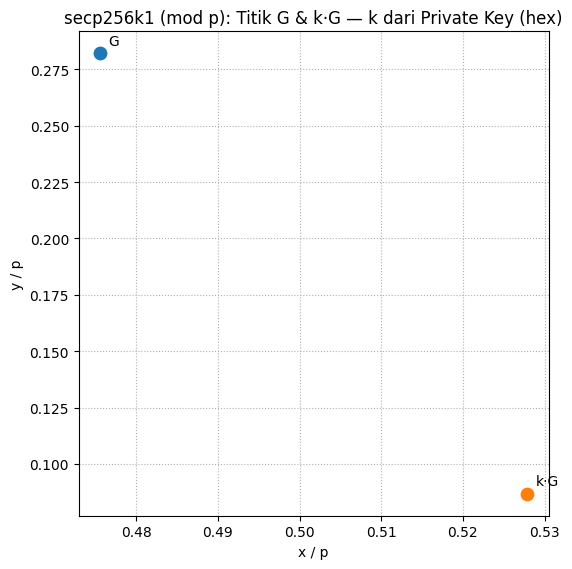

In [4]:
# Fungsi real: P = k·G di secp256k1 (mod p) dan plot HANYA dua titik (G & k·G)
# - Perhitungan sesuai Bitcoin (mod p), bukan kurva real.
# - Visualisasi: titik G dan titik hasil (x/p, y/p) di [0,1]^2 agar terlihat relatif.
# - Input: k bisa int atau hex string 32-byte (tanpa/ dengan '0x').
# - Output tambahan di console: pubkey terkompres (hex) dan koordinat (x,y).

import matplotlib.pyplot as plt

# Parameter secp256k1
p  = 0xFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFEFFFFFC2F
a  = 0
b  = 7
Gx = 55066263022277343669578718895168534326250603453777594175500187360389116729240
Gy = 32670510020758816978083085130507043184471273380659243275938904335757337482424
n  = 0xFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFEBAAEDCE6AF48A03BBFD25E8CD0364141
INF = None

def mod_inv(x, p):
    return pow(x % p, p - 2, p)

def point_add(P, Q):
    if P is INF: return Q
    if Q is INF: return P
    (x1, y1) = P; (x2, y2) = Q
    if x1 == x2 and (y1 + y2) % p == 0:
        return INF
    if P != Q:
        lam = ((y2 - y1) * mod_inv((x2 - x1) % p, p)) % p
    else:
        if y1 == 0: return INF
        lam = ((3 * x1 * x1 + a) * mod_inv((2 * y1) % p, p)) % p
    x3 = (lam * lam - x1 - x2) % p
    y3 = (lam * (x1 - x3) - y1) % p
    return (x3, y3)

def scalar_mult(k, P):
    if not (1 <= k < n):
        raise ValueError("k di luar rentang (1 ≤ k < n).")
    R = INF
    Q = P
    for bit in bin(k)[2:]:
        if R is not INF:
            R = point_add(R, R)
        if bit == '1':
            R = point_add(R, Q) if R is not INF else Q
    return R

def parse_k(k_input):
    if isinstance(k_input, int):
        return k_input
    if isinstance(k_input, str):
        s = k_input.strip().lower()
        if s.startswith("0x"):
            s = s[2:]
        return int(s, 16)
    raise TypeError("k harus int atau string hex.")

def compress_pubkey(P):
    x, y = P
    prefix = 0x02 if (y % 2 == 0) else 0x03
    return bytes([prefix]) + x.to_bytes(32, 'big')

def plot_two_points_G_and_kG(k_input, title_suffix=""):
    G = (Gx, Gy)
    k = parse_k(k_input)
    Pk = scalar_mult(k, G)

    # Info: koordinat & pubkey
    xG, yG = G
    xk, yk = Pk
    comp = compress_pubkey(Pk).hex()

    print("k (decimal):", k)
    print("k (hex)    :", hex(k)[2:])
    print("P = k·G:")
    print("  x:", xk)
    print("  y:", yk)
    print("  pubkey compressed (hex):", comp)

    # Plot hanya dua titik di ruang ternormalisasi [0,1]^2
    plt.figure(figsize=(5.8, 5.8))
    plt.scatter([xG/p], [yG/p], s=80)
    plt.scatter([xk/p], [yk/p], s=80)
    plt.annotate("G", (xG/p, yG/p), xytext=(6,6), textcoords="offset points")
    plt.annotate("k·G", (xk/p, yk/p), xytext=(6,6), textcoords="offset points")
    plt.xlabel("x / p"); plt.ylabel("y / p")
    title = "secp256k1 (mod p): Titik G & k·G"
    if title_suffix:
        title += f" — {title_suffix}"
    plt.title(title)
    plt.grid(True, linestyle=":")
    plt.tight_layout()
    plt.show()

# ===== Jalankan dengan input HEX yang Anda berikan =====
PRIVATE_KEY_HEX = "deb9a1e9022ff8ddecab559c3df7910d4ed827d41c39051b6640f159abb3b371"
plot_two_points_G_and_kG(PRIVATE_KEY_HEX, title_suffix="k dari Private Key (hex)")


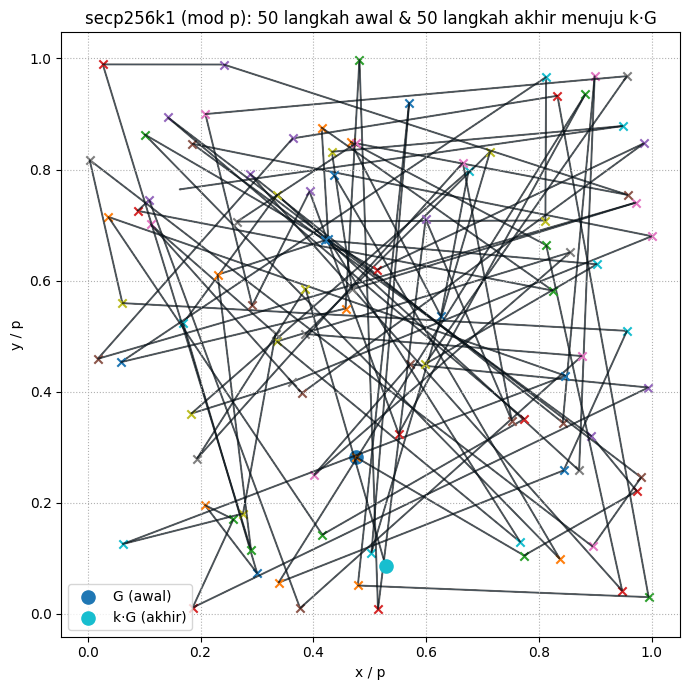

In [6]:
# Visualisasi real: 50 langkah awal (1G..50G) dan 50 langkah akhir ((k-49)G..kG) di secp256k1 (mod p)
# - Perhitungan sesuai kurva Bitcoin (mod p).
# - Titik divisualkan dalam koordinat ternormalisasi (x/p, y/p) pada [0,1]^2.
# - Panah menunjukkan arah "gerakan".
# - Satu plot saja, sesuai aturan.

import matplotlib.pyplot as plt

# ===== Parameter secp256k1 =====
p  = 0xFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFEFFFFFC2F
a  = 0
b  = 7
Gx = 55066263022277343669578718895168534326250603453777594175500187360389116729240
Gy = 32670510020758816978083085130507043184471273380659243275938904335757337482424
n  = 0xFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFEBAAEDCE6AF48A03BBFD25E8CD0364141
INF = None

def mod_inv(x, p):
    return pow(x % p, p - 2, p)

def point_add(P, Q):
    if P is INF: return Q
    if Q is INF: return P
    (x1, y1) = P; (x2, y2) = Q
    if x1 == x2 and (y1 + y2) % p == 0:
        return INF
    if P != Q:
        lam = ((y2 - y1) * mod_inv((x2 - x1) % p, p)) % p
    else:
        if y1 == 0: return INF
        lam = ((3 * x1 * x1 + a) * mod_inv((2 * y1) % p, p)) % p
    x3 = (lam * lam - x1 - x2) % p
    y3 = (lam * (x1 - x3) - y1) % p
    return (x3, y3)

def point_neg(P):
    x, y = P
    return (x, (-y) % p)

def point_sub(P, Q):
    return point_add(P, point_neg(Q))

def scalar_mult(k, P):
    if not (1 <= k < n):
        raise ValueError("k di luar rentang (1 ≤ k < n).")
    R = INF
    Q = P
    for bit in bin(k)[2:]:
        if R is not INF:
            R = point_add(R, R)
        if bit == '1':
            R = Q if R is INF else point_add(R, Q)
    return R

def parse_k(k_input):
    if isinstance(k_input, int):
        return k_input
    if isinstance(k_input, str):
        s = k_input.strip().lower()
        if s.startswith("0x"): s = s[2:]
        return int(s, 16)
    raise TypeError("k harus int atau string hex.")

def plot_first_and_last_steps(k_input, head=50, tail=50):
    k = parse_k(k_input)
    G = (Gx, Gy)

    # --- 50 langkah awal: 1G..head*G ---
    first_pts = []
    cur = G
    for _ in range(head):
        first_pts.append(cur)
        cur = point_add(cur, G)

    # --- Titik akhir kG ---
    kG = scalar_mult(k, G)

    # --- 50 langkah terakhir mundur dari kG: kG, (k-1)G, ..., (k-tail+1)G ---
    last_pts_rev = [kG]
    cur = kG
    for _ in range(tail-1):
        cur = point_sub(cur, G)  # (i-1)G = iG - G
        last_pts_rev.append(cur)
    last_pts = list(reversed(last_pts_rev))  # urut: (k-tail+1)G .. kG

    # --- Normalisasi ke [0,1]^2 ---
    def norm_pts(pts): 
        xs = [x/p for (x,y) in pts]
        ys = [y/p for (x,y) in pts]
        return xs, ys

    xs_first, ys_first = norm_pts(first_pts)
    xs_last,  ys_last  = norm_pts(last_pts)
    xG_n, yG_n = Gx/p, Gy/p
    xk_n, yk_n = kG[0]/p, kG[1]/p

    # --- Plot ---
    plt.figure(figsize=(7,7))
    # G awal
    plt.scatter([xG_n], [yG_n], s=90, label="G (awal)")
    # 50 pertama (marker 'x' + panah antar-langkah)
    for i in range(len(xs_first)-1):
        plt.scatter([xs_first[i]], [ys_first[i]], marker='x')
        plt.arrow(xs_first[i], ys_first[i],
                  xs_first[i+1]-xs_first[i], ys_first[i+1]-ys_first[i],
                  head_width=0.002, length_includes_head=True, alpha=0.6)
    # 50 terakhir (marker 'x' + panah)
    for i in range(len(xs_last)-1):
        plt.scatter([xs_last[i]], [ys_last[i]], marker='x')
        plt.arrow(xs_last[i], ys_last[i],
                  xs_last[i+1]-xs_last[i], ys_last[i+1]-ys_last[i],
                  head_width=0.002, length_includes_head=True, alpha=0.6)
    # Titik akhir kG
    plt.scatter([xk_n], [yk_n], s=90, label=f"k·G (akhir)")

    plt.title(f"secp256k1 (mod p): 50 langkah awal & 50 langkah akhir menuju k·G")
    plt.xlabel("x / p"); plt.ylabel("y / p")
    plt.legend()
    plt.grid(True, linestyle=":")
    plt.tight_layout()
    plt.show()

# === Jalankan dengan k dari private key hex yang Anda berikan ===
hex_k = "deb9a1e9022ff8ddecab559c3df7910d4ed827d41c39051b6640f159abb3b371"
plot_first_and_last_steps(hex_k, head=50, tail=50)


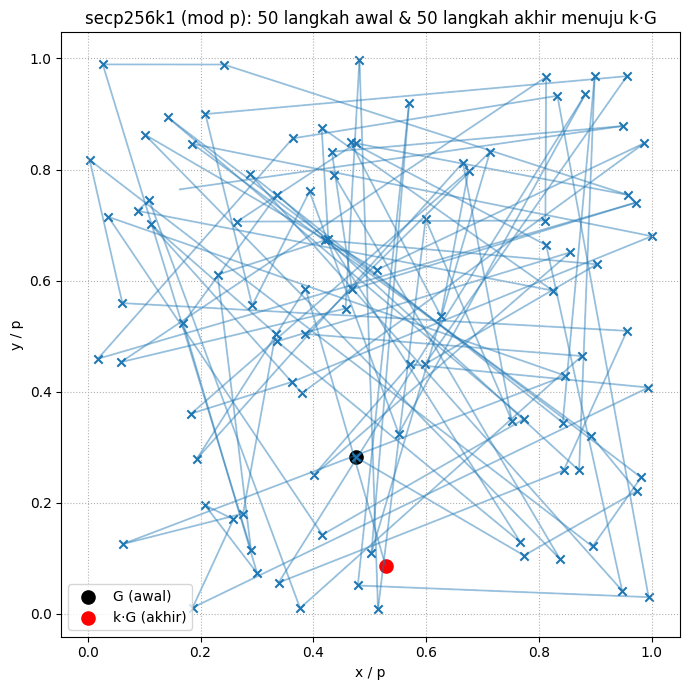

In [7]:
# Update visual: semua titik jejak 'x' berwarna sama, garis penghubung transparan + panah,
# G awal hitam, k·G akhir merah.

import matplotlib.pyplot as plt

def plot_first_and_last_steps_styled(k_input, head=50, tail=50, color_trail="#1f77b4", alpha_line=0.35):
    k = parse_k(k_input)
    G = (Gx, Gy)

    # --- 50 langkah awal ---
    first_pts = []
    cur = G
    for _ in range(head):
        first_pts.append(cur)
        cur = point_add(cur, G)

    # --- kG dan 50 langkah akhir (mundur) ---
    kG = scalar_mult(k, G)
    last_pts_rev = [kG]
    cur = kG
    for _ in range(tail-1):
        cur = point_sub(cur, G)  # (i-1)G = iG - G
        last_pts_rev.append(cur)
    last_pts = list(reversed(last_pts_rev))

    def norm(pts): 
        return [x/p for (x,y) in pts], [y/p for (x,y) in pts]

    xs_first, ys_first = norm(first_pts)
    xs_last,  ys_last  = norm(last_pts)
    xG_n, yG_n = Gx/p, Gy/p
    xk_n, yk_n = kG[0]/p, kG[1]/p

    plt.figure(figsize=(7,7))

    # G awal & kG akhir
    plt.scatter([xG_n], [yG_n], s=90, c="black", label="G (awal)")
    plt.scatter([xk_n], [yk_n], s=90, c="red", label="k·G (akhir)")

    # Jejak awal (x + panah transparan)
    for i in range(len(xs_first)-1):
        plt.scatter([xs_first[i]], [ys_first[i]], marker='x', c=color_trail)
        plt.arrow(xs_first[i], ys_first[i],
                  xs_first[i+1]-xs_first[i], ys_first[i+1]-ys_first[i],
                  head_width=0.002, length_includes_head=True,
                  color=color_trail, alpha=alpha_line)

    # Jejak akhir (x + panah transparan)
    for i in range(len(xs_last)-1):
        plt.scatter([xs_last[i]], [ys_last[i]], marker='x', c=color_trail)
        plt.arrow(xs_last[i], ys_last[i],
                  xs_last[i+1]-xs_last[i], ys_last[i+1]-ys_last[i],
                  head_width=0.002, length_includes_head=True,
                  color=color_trail, alpha=alpha_line)

    plt.title("secp256k1 (mod p): 50 langkah awal & 50 langkah akhir menuju k·G")
    plt.xlabel("x / p"); plt.ylabel("y / p")
    plt.legend()
    plt.grid(True, linestyle=":")
    plt.tight_layout()
    plt.show()

# Jalankan dengan private key hex Anda
hex_k = "deb9a1e9022ff8ddecab559c3df7910d4ed827d41c39051b6640f159abb3b371"
plot_first_and_last_steps_styled(hex_k, head=50, tail=50)


In [8]:
import pandas as pd

def generate_keypairs_table(K_hex, head=50, tail=50):
    G = (Gx,Gy); K=parse_k(K_hex)
    rows=[]
    cur=G
    for k in range(1,head+1):
        rows.append({"section":"start","k":k,"k_hex":hex(k),
                     "pubkey_compressed":compress_pubkey(cur),
                     "x":cur[0],"y":cur[1]})
        cur=point_add(cur,G)

    KG=scalar_mult(K,G)
    last_pts_rev=[KG]; cur=KG
    for _ in range(tail-1):
        cur=point_sub(cur,G); last_pts_rev.append(cur)
    last_pts=list(reversed(last_pts_rev))
    start_tail=K-tail+1

    for i,Pk in enumerate(last_pts):
        rows.append({"section":"end","k":start_tail+i,"k_hex":hex(start_tail+i),
                     "pubkey_compressed":compress_pubkey(Pk),
                     "x":Pk[0],"y":Pk[1]})
    return pd.DataFrame(rows)


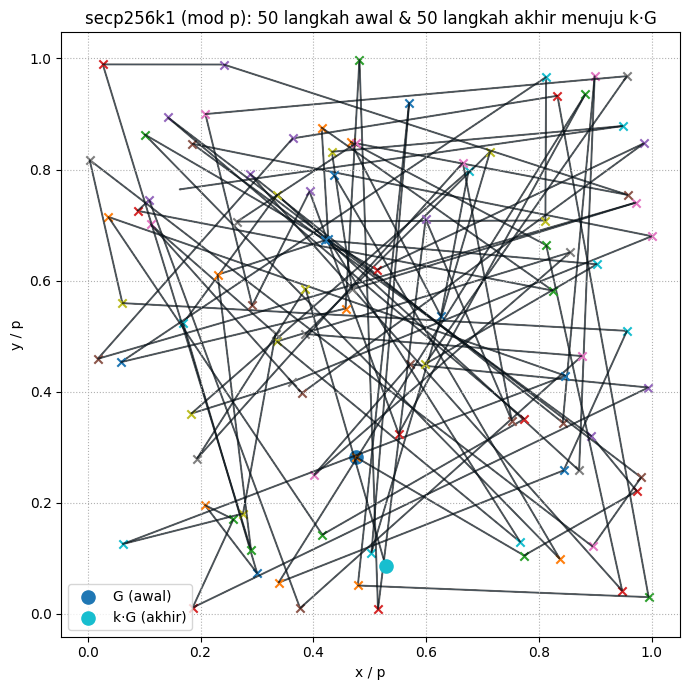

,section,k,k_hex,pubkey_compressed,x,y
0,start,1,0x1,b'\x02y\xbef~\xf9\xdc\xbb\xacU\xa0b\x95\xce\x8...,5506626302227734366957871889516853432625060345...,3267051002075881697808308513050704318447127338...
1,start,2,0x2,b'\x02\xc6\x04\x7f\x94A\xed}m0E@n\x95\xc0|\xd8...,8956589192654700423125292042593569236064414582...,1215839929969383032296780861271339863615536788...
2,start,3,0x3,b'\x02\xf90\x8a\x01\x92X\xc3\x10I4O\x85\xf8\x9...,1127116604397106060567486591739296731021149773...,2558302798057088369165690587740197640644886825...
3,start,4,0x4,b'\x02\xe4\x93\xdb\xf1\xc1\r\x80\xf3X\x1eI\x04...,1033885739956350803597491642542165983087888353...,3705714114524212301301531663086432955014021692...
4,start,5,0x5,b'\x02/\x8b\xdeM\x1a\x07 \x93U\xb4\xa7%\n\\Q(\...,2150582989176364811432905598761923649410213331...,9800370867876262123368324050308086012902688732...


,section,k,k_hex,pubkey_compressed,x,y
95,end,1007414365555289052222829347864295206684755966...,0xdeb9a1e9022ff8ddecab559c3df7910d4ed827d41c39...,"b'\x03\xc0u""\xd8y\xf3\xe2\x12\xbbM\x01\xd3\xf2...",8705102853013360349727757209711385253019373905...,4027721620988227420971385359086167101980596260...
96,end,1007414365555289052222829347864295206684755966...,0xdeb9a1e9022ff8ddecab559c3df7910d4ed827d41c39...,b'\x02\xaa<\xb1\xbb8\xfb\xa5\x97\xd5\xf0\x04\x...,7700042173965640761247662962350702865394581617...,9404861033778655049803318844414481588158950618...
97,end,1007414365555289052222829347864295206684755966...,0xdeb9a1e9022ff8ddecab559c3df7910d4ed827d41c39...,b'\x021\x98\x19\xffn\xbfYG\xbb~\xbc\xd5\x13\xc...,2243206976453450572980828467750894164772320787...,3236008265022095639777778901378035336739533686...
98,end,1007414365555289052222829347864295206684755966...,0xdeb9a1e9022ff8ddecab559c3df7910d4ed827d41c39...,b'\x03b\xd2\x8a\xedM\xc5\x83\x17\xceB+\xc45\xf...,4469865588345708219854411134289394338466886368...,6782779453988270192508059020393957067779129103...
99,end,1007414365555289052222829347864295206684755966...,0xdeb9a1e9022ff8ddecab559c3df7910d4ed827d41c39...,b'\x02\x87$H\x80\x0c\xe6\x15Pq\x94\xf8c\x04C\x...,6112634143104152484485909366719867987500705136...,1004642186530928102197150918432326932034855062...


In [9]:
# Input contoh
K_HEX = "deb9a1e9022ff8ddecab559c3df7910d4ed827d41c39051b6640f159abb3b371"

# Plot
plot_first_and_last_steps(K_HEX, head=50, tail=50)

# Tabel
df = generate_keypairs_table(K_HEX, head=50, tail=50)
display(df.head(), df.tail())

# Simpan CSV
df.to_csv("keypairs_start_end.csv",index=False)


In [10]:
# Fungsi mandiri: input Private Key (int/hex) → output P = k·G (secp256k1)
# - Mengembalikan koordinat (x, y), serta public key SEC (compressed & uncompressed, hex).
# - Validasi rentang k: 1 ≤ k < n.

# Parameter secp256k1
p  = 0xFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFEFFFFFC2F
a  = 0
b  = 7
Gx = 55066263022277343669578718895168534326250603453777594175500187360389116729240
Gy = 32670510020758816978083085130507043184471273380659243275938904335757337482424
n  = 0xFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFEBAAEDCE6AF48A03BBFD25E8CD0364141
INF = None

def _mod_inv(x, p):
    return pow(x % p, p - 2, p)

def _point_add(P, Q):
    if P is INF: return Q
    if Q is INF: return P
    (x1, y1) = P; (x2, y2) = Q
    if x1 == x2 and (y1 + y2) % p == 0:
        return INF
    if P != Q:
        lam = ((y2 - y1) * _mod_inv((x2 - x1) % p, p)) % p
    else:
        if y1 == 0: return INF
        lam = ((3 * x1 * x1 + a) * _mod_inv((2 * y1) % p, p)) % p
    x3 = (lam * lam - x1 - x2) % p
    y3 = (lam * (x1 - x3) - y1) % p
    return (x3, y3)

def _scalar_mult(k, P):
    if not (1 <= k < n):
        raise ValueError("Private key k di luar rentang (1 ≤ k < n).")
    R = INF
    Q = P
    for bit in bin(k)[2:]:
        if R is not INF:
            R = _point_add(R, R)
        if bit == '1':
            R = Q if R is INF else _point_add(R, Q)
    return R

def _parse_k(k_input):
    if isinstance(k_input, int):
        return k_input
    s = str(k_input).strip().lower()
    if s.startswith("0x"): s = s[2:]
    return int(s, 16)

def _sec_compressed(P):
    x, y = P
    prefix = 0x02 if (y % 2 == 0) else 0x03
    return (bytes([prefix]) + x.to_bytes(32, 'big')).hex()

def _sec_uncompressed(P):
    x, y = P
    return (b'\x04' + x.to_bytes(32,'big') + y.to_bytes(32,'big')).hex()

def privkey_to_pubkey(k_input):
    """
    Input:
      - k_input: int atau hex string (dengan/ tanpa '0x')
    Output (dict):
      - 'k_decimal', 'k_hex'
      - 'x', 'y' (int)
      - 'pubkey_sec_compressed_hex', 'pubkey_sec_uncompressed_hex'
    """
    k = _parse_k(k_input)
    P = _scalar_mult(k, (Gx, Gy))
    x, y = P
    return {
        "k_decimal": k,
        "k_hex": hex(k)[2:],
        "x": x,
        "y": y,
        "pubkey_sec_compressed_hex": _sec_compressed(P),
        "pubkey_sec_uncompressed_hex": _sec_uncompressed(P),
    }

# ===== Contoh pemakaian: ganti HEX di bawah dengan milik Anda =====
example_hex = "deb9a1e9022ff8ddecab559c3df7910d4ed827d41c39051b6640f159abb3b371"
out = privkey_to_pubkey(example_hex)
print("Private key (hex):", out["k_hex"])
print("Public key (SEC compressed):", out["pubkey_sec_compressed_hex"])
print("Public key (SEC uncompressed):", out["pubkey_sec_uncompressed_hex"])
print("x:", out["x"])
print("y:", out["y"])


Private key (hex): deb9a1e9022ff8ddecab559c3df7910d4ed827d41c39051b6640f159abb3b371
Public key (SEC compressed): 02872448800ce615507194f86304431325566e62b5b0297311dc51717788f17b41
Public key (SEC uncompressed): 04872448800ce615507194f86304431325566e62b5b0297311dc51717788f17b41163612c1c086dc80235e4329d34a6a7e3cf90fcbc1003ba3fa735ab4088aa102
x: 61126341431041524844859093667198679875007051369126692376729286632078130117441
y: 10046421865309281021971509184323269320348550629399908225716984302339713835266


Private key (hex): deb9a1e9022ff8ddecab559c3df7910d4ed827d41c39051b6640f159abb3b371
Bit-length k      : 256 bit
Total langkah operasi: 389
— Cuplikan awal —
01. set (bit=1)
02. double (bit=1)
03. add (bit=1)
04. double (bit=0)
05. double (bit=1)
06. add (bit=1)
07. double (bit=1)
08. add (bit=1)
— Cuplikan akhir —
382. add (bit=1)
383. double (bit=1)
384. add (bit=1)
385. double (bit=0)
386. double (bit=0)
387. double (bit=0)
388. double (bit=1)
389. add (bit=1)

Public key (compressed): 03b3c55ca20e7288ae3c371105545b280c85c81d680849350f90a6f2469896b5ce
Public key (uncompressed): 04b3c55ca20e7288ae3c371105545b280c85c81d680849350f90a6f2469896b5ce4128076b932dbf03679d1e645bce4c518dd2395fe50ce9b7bee842c32a1aa71d


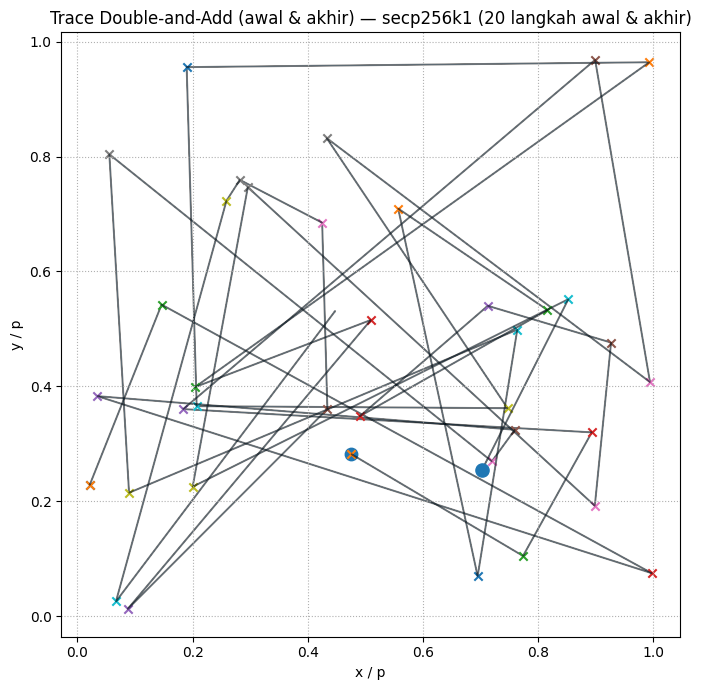

In [12]:
# === Double-and-Add (trace nyata) di secp256k1 + Visualisasi langkah awal & akhir ===
# - Input: private key (hex)
# - Output: ringkasan langkah (jumlah bit, cuplikan awal/akhir), public key (SEC), dan 2 plot
#   yang menampilkan lintasan R pada beberapa langkah awal & akhir (dengan panah).
#
# Catatan:
# - Perhitungan 100% modular secp256k1 (Bitcoin).
# - Visualisasi: titik dinormalisasi ke [0,1]^2 (x/p, y/p). Tidak ada kurva mulus (finite field).

import matplotlib.pyplot as plt

# ---------- Parameter secp256k1 ----------
p  = 0xFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFEFFFFFC2F
a  = 0
b  = 7
Gx = 55066263022277343669578718895168534326250603453777594175500187360389116729240
Gy = 32670510020758816978083085130507043184471273380659243275938904335757337482424
n  = 0xFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFEBAAEDCE6AF48A03BBFD25E8CD0364141
INF = None

def mod_inv(x, p):
    return pow(x % p, p - 2, p)

def point_add(P, Q):
    if P is INF: return Q
    if Q is INF: return P
    (x1, y1) = P; (x2, y2) = Q
    if x1 == x2 and (y1 + y2) % p == 0:
        return INF
    if P != Q:
        lam = ((y2 - y1) * mod_inv((x2 - x1) % p, p)) % p
    else:
        if y1 == 0: return INF
        lam = ((3 * x1 * x1 + a) * mod_inv((2 * y1) % p, p)) % p
    x3 = (lam * lam - x1 - x2) % p
    y3 = (lam * (x1 - x3) - y1) % p
    return (x3, y3)

def scalar_mult_trace(k, P):
    """
    Double-and-add dengan jejak langkah.
    Return:
      - R_final (k·P)
      - trace: list of dict, masing-masing berisi info operasi dan titik R_before/R_after.
    """
    bits = bin(k)[2:]  # MSB -> LSB
    R = INF
    Q = P
    trace = []
    for b in bits:
        # doubling (jika R sudah bukan INF)
        if R is not INF:
            R_before = R
            R = point_add(R, R)
            trace.append({"op":"double", "bit": b, "R_before": R_before, "R_after": R})
        # addition (bila bit=1)
        if b == '1':
            if R is INF:
                # set R = Q
                R_before = R
                R = Q
                trace.append({"op":"set", "bit": b, "R_before": R_before, "R_after": R})
            else:
                R_before = R
                R = point_add(R, Q)
                trace.append({"op":"add", "bit": b, "R_before": R_before, "R_after": R})
        # update Q ← 2Q
        Q = point_add(Q, Q)
    return R, trace

def parse_k_hex(hex_str: str) -> int:
    s = hex_str.strip().lower()
    if s.startswith("0x"): s = s[2:]
    return int(s, 16)

def sec_compressed(P):
    x, y = P
    prefix = 0x02 if (y % 2 == 0) else 0x03
    return (bytes([prefix]) + x.to_bytes(32, 'big')).hex()

def sec_uncompressed(P):
    x, y = P
    return (b'\x04' + x.to_bytes(32, 'big') + y.to_bytes(32, 'big')).hex()

def summarize_trace(trace, head=8, tail=8):
    # Buat ringkasan singkat beberapa langkah awal/akhir
    lines = []
    total = len(trace)
    lines.append(f"Total langkah operasi: {total}")
    lines.append("— Cuplikan awal —")
    for i, t in enumerate(trace[:head], 1):
        lines.append(f"{i:02d}. {t['op']} (bit={t['bit']})")
    lines.append("— Cuplikan akhir —")
    tail_list = trace[-tail:] if total >= tail else trace
    for i, t in enumerate(tail_list, total - len(tail_list) + 1):
        lines.append(f"{i:02d}. {t['op']} (bit={t['bit']})")
    return "\n".join(lines)

def plot_trace_segments(trace, head_steps=20, tail_steps=20, title_note=""):
    """
    Plot langkah-langkah R (R_after) pada beberapa langkah awal & akhir.
    - Semua titik dinormalisasi (x/p, y/p).
    - Hanya 1 plot (tanpa subplots), sesuai aturan tool.
    """
    # Ambil daftar titik hasil (R_after) saja, abaikan INF
    points = [t["R_after"] for t in trace if t["R_after"] is not INF]
    if not points:
        return  # tidak ada yang bisa diplot

    # Segmentasi awal & akhir
    pts_head = points[:head_steps]
    pts_tail = points[-tail_steps:] if len(points) > tail_steps else points

    def norm_xy(P):
        return (P[0] / p, P[1] / p)

    plt.figure(figsize=(7, 7))

    # Plot HEAD (awal) dengan panah
    if len(pts_head) >= 1:
        x0, y0 = norm_xy(pts_head[0])
        plt.scatter([x0], [y0], s=80)  # titik pertama di head
        for i in range(len(pts_head) - 1):
            x1, y1 = norm_xy(pts_head[i])
            x2, y2 = norm_xy(pts_head[i+1])
            plt.scatter([x1], [y1], marker='x')
            plt.arrow(x1, y1, x2 - x1, y2 - y1, head_width=0.002, length_includes_head=True, alpha=0.5)

    # Plot TAIL (akhir) dengan panah
    if len(pts_tail) >= 1:
        # tandai titik awal segmen tail
        x0, y0 = norm_xy(pts_tail[0])
        plt.scatter([x0], [y0], marker='x')
        for i in range(len(pts_tail) - 1):
            x1, y1 = norm_xy(pts_tail[i])
            x2, y2 = norm_xy(pts_tail[i+1])
            plt.scatter([x1], [y1], marker='x')
            plt.arrow(x1, y1, x2 - x1, y2 - y1, head_width=0.002, length_includes_head=True, alpha=0.5)

        # tandai titik akhir (k·G)
        x_end, y_end = norm_xy(pts_tail[-1])
        plt.scatter([x_end], [y_end], s=90)

    plt.title(f"Trace Double-and-Add (awal & akhir) — secp256k1 {title_note}")
    plt.xlabel("x / p"); plt.ylabel("y / p")
    plt.grid(True, linestyle=":")
    plt.tight_layout()
    plt.show()

# ======== CONTOH PEMAKAIAN DENGAN PRIVATE KEY HEX ANDA ========
hex_k = "deb9a1e9022ff8ddecab559c3df7910d4ed827d41c39051b6640f159abb3b371"
k = parse_k_hex(hex_k)

# Hitung jejak
P_final, trace = scalar_mult_trace(k, (Gx, Gy))

# Ringkasan
print("Private key (hex):", hex_k)
print("Bit-length k      :", k.bit_length(), "bit")
print(summarize_trace(trace, head=8, tail=8))

# Public key
print("\nPublic key (compressed):", sec_compressed(P_final))
print("Public key (uncompressed):", sec_uncompressed(P_final))

# Plot beberapa langkah awal & akhir
plot_trace_segments(trace, head_steps=20, tail_steps=20, title_note="(20 langkah awal & akhir)")


Brute Force Mainan Untuk Ruang Kecil

In [13]:
p = 17
a, b = 2, 2
INF = None

def inv_mod(x, p): return pow(x, p-2, p)

def point_add(P, Q):
    if P is INF: return Q
    if Q is INF: return P
    x1,y1 = P; x2,y2 = Q
    if x1==x2 and (y1+y2)%p==0: return INF
    if P!=Q:
        lam = ((y2-y1)*inv_mod(x2-x1,p))%p
    else:
        lam = ((3*x1*x1+a)*inv_mod(2*y1,p))%p
    x3=(lam*lam-x1-x2)%p
    y3=(lam*(x1-x3)-y1)%p
    return (x3,y3)

def scalar_mult(k,G):
    R=INF; Q=G
    for bit in bin(k)[2:]:
        if R is not INF: R=point_add(R,R)
        if bit=="1": R=Q if R is INF else point_add(R,Q)
        Q=point_add(Q,Q)
    return R

# Generator
G=(5,1)

# Private key
k=7
P=scalar_mult(k,G)
print("Private key:",k)
print("Public key:",P)

# Brute force
for guess in range(1,20):
    if scalar_mult(guess,G)==P:
        print("Ditemukan kembali private key:",guess)
        break


Private key: 7
Public key: (0, 11)
Ditemukan kembali private key: 7


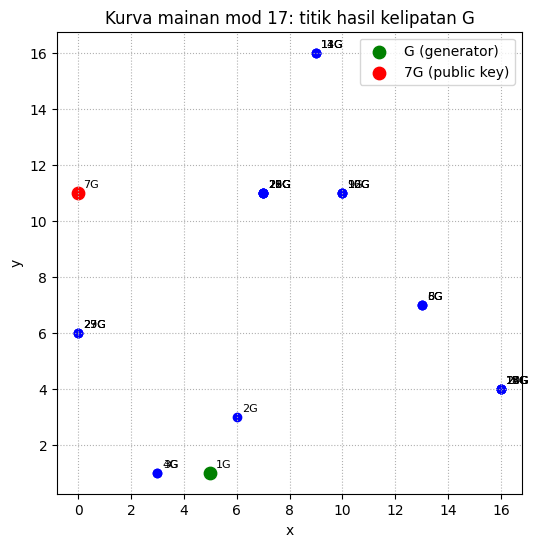

In [14]:
# Plot titik-titik hasil 1G, 2G, …, nG di kurva mainan kecil (p=17, y^2 = x^3+2x+2 mod 17)
# Visualisasi siklus untuk menunjukkan brute force bekerja.

p = 17
a, b = 2, 2
INF = None

def inv_mod(x, p): return pow(x, p-2, p)

def point_add(P, Q):
    if P is INF: return Q
    if Q is INF: return P
    x1,y1 = P; x2,y2 = Q
    if x1==x2 and (y1+y2)%p==0: return INF
    if P!=Q:
        lam = ((y2-y1)*inv_mod(x2-x1,p))%p
    else:
        lam = ((3*x1*x1+a)*inv_mod(2*y1,p))%p
    x3=(lam*lam-x1-x2)%p
    y3=(lam*(x1-x3)-y1)%p
    return (x3,y3)

def scalar_mult(k,G):
    R=INF; Q=G
    for bit in bin(k)[2:]:
        if R is not INF: R=point_add(R,R)
        if bit=="1": R=Q if R is INF else point_add(R,Q)
        Q=point_add(Q,Q)
    return R

# Generator & private key
G=(5,1)
k=7
P=scalar_mult(k,G)

# Generate semua titik hingga order G (siklus)
points=[]
cur=None
for i in range(1,30):
    cur=scalar_mult(i,G)
    if cur is INF: break
    points.append((i,cur))

# Plot
import matplotlib.pyplot as plt

xs=[x for (_, (x,y)) in points]
ys=[y for (_, (x,y)) in points]

plt.figure(figsize=(6,6))
for i,(m,(x,y)) in enumerate(points,1):
    plt.scatter(x,y,c="blue")
    plt.text(x+0.2,y+0.2,f"{m}G",fontsize=8)
# highlight generator & target P
plt.scatter(G[0],G[1],c="green",s=80,label="G (generator)")
plt.scatter(P[0],P[1],c="red",s=80,label=f"{k}G (public key)")

plt.title("Kurva mainan mod 17: titik hasil kelipatan G")
plt.xlabel("x"); plt.ylabel("y")
plt.legend()
plt.grid(True,linestyle=":")
plt.show()
